# To do

* Make the get_vals function more abstract so that it applies to 'name' and 'gender' etc.
* Extract cast genders
* Extract crew information... how many of each role

# Steps

* Look at big picture
* Get data
* Visualize data to gain insights
* Prepare data for ML
* Select model and train
* Fine-tune model
* Present solution
* Launch, monitor, and maintain

[Useful reference](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation)

## Find box office hits

My task is to build a model of box office revenue for movies from The Movie Database. The results of this model would feed into a decision-making algorithm that a big movie theater chain uses to select which movies to run. The output of this supervised regression is critical to optimizing ticket revenue for your employer.

Current estimations are currently done mainly by intuition and checking buzz.

### Check assumptions

I'm going to build a model off of these movies titles to build a box office forecast for future movies. 

* Does this need to be a regression task?
* Should it be online? Or is it okay that it's offline?
* How expansive is this data? Is it enough to make statements about other movies, or should more data be collected?
* Are these titles are representative of the full gamut of movies?
* Are movie-going patterns the same today that they were 10 years ago? Will be the same that they are 10 years later?

I'm going to treat this as a continuous regression task. It's possible to run this as a classification task or interval regression task as well.

I'm going to run it offline and in batch since the data isn't so big; if I were to deploy this project I would set it up as an online learning problem. There probably isn't enough data to make broader generalizations. And if we were to deploy, weighting movies that are more recent is a good idea as media consumption has changed significantly in just the past five years.

## Get the data

This data comes from a [Kaggle competition](https://www.kaggle.com/c/tmdb-box-office-prediction/data) hosted by TMDB.

In [1]:
import pandas as pd

In [2]:
## renamed the training data to TMDB_movie_data.csv, and stored it in a local folder called Data
movies = pd.read_csv("../Data/TMDB_movie_data.csv")
movies.shape

(3000, 23)

There's only 3000 samples of training data, which seems a bit scarce.

In [3]:
movies.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
movies[['belongs_to_collection','genres','production_companies',
        'production_countries','spoken_languages',
        'Keywords','cast','crew']].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


These columns store data as lists of dictionaries. Time to extract info form these guys.

`popularity` is an attribute that probably wouldn't normally be available prior to release, but I want to predict the box office without knowing any future information about a movie.

In [5]:
movies.drop('popularity',axis=1,inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast                  

In [6]:
import matplotlib.pyplot as plt
movies[['budget','runtime','revenue']].hist(bins=50,figsize=(12,6));
plt.show();

<Figure size 1200x600 with 4 Axes>

It seems like budget generally outpaces revenue, since it's on a larger scale. Both budget and revenue are right-tailed.

Average movie length is around 100 minutes.

## Split the data

Budget is one of the most important predictors of box office gross. Because it's so important to predicting revenue, I want to make sure all my training and testing data are representative of all budgets. I can use [stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling) -- sampling with respect to groupings (strata) -- to achieve this. This isn't an example of data leakage because I'm creating strata based off of outside research, rather than what I'm observing in the full dataset.

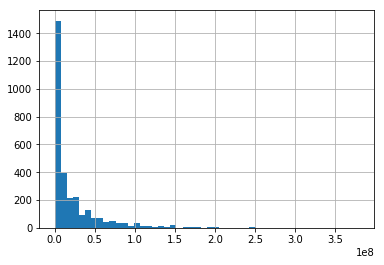

In [7]:
movies['budget'].hist(bins=50);

The buckets that I'm using are based off of the writer's guild budget agreements and a bit of tweaking on my part. I'll use low budget (< \\$30m), medium budget (between \\$30 and \\$80m), and high budget (> \\$80m)  as the strata in a temporary feature called `budget_cat`. 

In [8]:
movies['budget_cat'] = pd.cut(movies['budget'],[0,30000000,80000000,5000000000],labels=['low','medium','high'])

# make NaN cateogry, fill it in
movies['budget_cat'] = movies['budget_cat'].cat.add_categories('unknown')
movies['budget_cat'].fillna('unknown',inplace=True)

In [9]:
movies['budget_cat'].value_counts()

low        1505
unknown     812
medium      487
high        196
Name: budget_cat, dtype: int64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=14)

for train_index, test_index in split.split(movies, movies['budget_cat']):
    strat_train = movies.loc[train_index]
    strat_test = movies.loc[test_index]

The proportions of the original and training dataset should be the same.

In [11]:
movies['budget_cat'].value_counts()/len(movies)

low        0.501667
unknown    0.270667
medium     0.162333
high       0.065333
Name: budget_cat, dtype: float64

In [12]:
strat_train['budget_cat'].value_counts()/len(strat_train)

low        0.501667
unknown    0.270417
medium     0.162500
high       0.065417
Name: budget_cat, dtype: float64

Next, I remove the `budget_cat` attribute.

In [13]:
for set in [strat_train,strat_test]:
    set.drop(['budget_cat'],axis=1,inplace=True)

## Explore the data

Only visualize on the training data; save test set for testing the data

In [14]:
strat_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2545,2546,NaN,45000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.patriotsdayfilm.com/,tt4572514,en,Patriots Day,An account of Boston Police Commissioner Ed Da...,/mIDxsJTrOC7NhgOo3GziiHyKfsQ.jpg,...,12/12/16,133.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,The inside story of the world's greatest manhunt.,Patriots Day,"[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...","[{'cast_id': 4, 'character': 'Sgt. Tommy Saund...","[{'credit_id': '587cad3bc3a3684a9e01776f', 'de...",50548152
2415,2416,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0106387,en,Benny & Joon,A mentally ill young woman finds her love in a...,/2a7amuuML6xvBn6XWV1sPG1Cmd5.jpg,...,4/16/93,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A romance on the brink of reality.,Benny & Joon,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 2, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe43adc3a36847f8066f63', 'de...",23202734
1919,1920,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0458367,en,Right at Your Door,"A dirty bomb goes off in Los Angeles, jamming ...",/6h24yrqU5TfAMI6dZBdiDUU3M0p.jpg,...,1/23/06,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Right at Your Door,"[{'id': 4458, 'name': 'post-apocalyptic'}]","[{'cast_id': 3, 'character': 'Lexi', 'credit_i...","[{'credit_id': '52fe46709251416c75078597', 'de...",2043704
1462,1463,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://focusfeatures.com/its_kind_of_a_funny_s...,tt0804497,en,It's Kind of a Funny Story,A clinically depressed teenager gets a new sta...,/wADblWdHMk2SIaZRBazTGOTBf4w.jpg,...,7/6/10,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes what's in your head isn't as crazy a...,It's Kind of a Funny Story,"[{'id': 236, 'name': 'suicide'}, {'id': 894, '...","[{'cast_id': 11, 'character': 'Craig Gilner', ...","[{'credit_id': '567f355792514132db008f84', 'de...",6491240
220,221,NaN,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.cityoflifeanddeath.co.uk/,tt1124052,zh,南京!南京!,"City of Life and Death takes place in 1937, du...",/zCzNvesRkmkmlK0g2Abp4y4zhb0.jpg,...,4/22/09,132.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,City of Life and Death,"[{'id': 1327, 'name': 'war crimes'}, {'id': 15...","[{'cast_id': 1, 'character': 'Lu Jianxiong', '...","[{'credit_id': '53afe79a0e0a265975005fda', 'de...",10652498


At a glance, it looks like genres, spoken languages, keywords, cast, and crew are stored as json objects, so I'll have to build some functions to parse through those. imdb_id is an identifier so it probably won't be that useful. I think the original language variable could be an interesting predictor for revenue. 

What languages are these movies in? 

In [15]:
strat_train['original_language'].value_counts()

en    2067
fr      58
hi      37
es      36
ru      36
ja      30
it      18
cn      16
ko      15
de      14
zh      13
ta      12
sv       8
fa       5
ro       4
nl       4
pt       3
da       3
hu       2
tr       2
fi       2
pl       2
ml       2
te       2
no       1
mr       1
nb       1
id       1
cs       1
ar       1
ur       1
he       1
vi       1
Name: original_language, dtype: int64

As expected, most of these movies are in English, followed by French, Hindi, and other languages. There's clearly way too many levels here, so I'll want to bin many of these language categories as "other".

For example, there are 30 movies in Japanese out of 2400 movies overall, which is only 1% of the data. Since I don't have much domain knowledge, I'll test out two types of binning.

In [16]:
strat_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [17]:
strat_train['belongs_to_collection'][strat_train['belongs_to_collection'].notnull()].head()

300     [{'id': 91799, 'name': 'Tremors Collection', '...
1132    [{'id': 437628, 'name': 'Constantine Collectio...
166     [{'id': 173344, 'name': 'Qatsi Collection', 'p...
921     [{'id': 91361, 'name': 'Halloween Collection',...
2737    [{'id': 645, 'name': 'James Bond Collection', ...
Name: belongs_to_collection, dtype: object

What are the correlations between the numeric variables?

In [18]:
corr_matrix = strat_train.drop('id',axis=1).corr()
corr_matrix['revenue'].sort_values(ascending=False)

revenue    1.000000
budget     0.743399
runtime    0.195318
Name: revenue, dtype: float64

Budget and runtime are both very strongly correlated with revenue. 

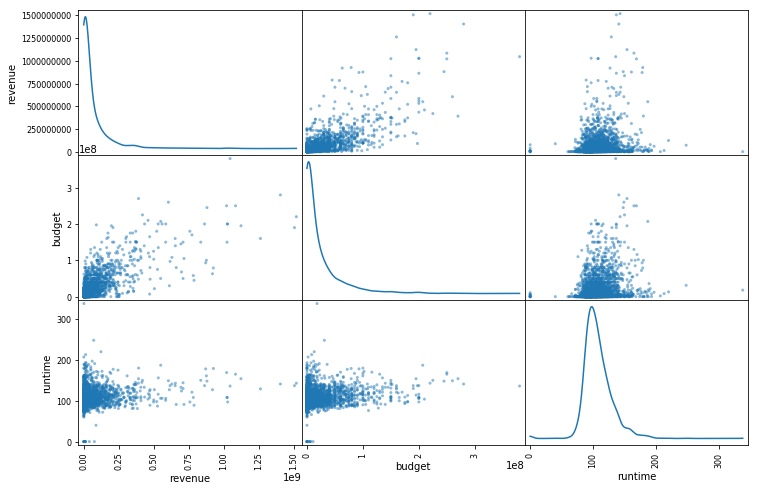

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["revenue","budget","runtime"]
scatter_matrix(strat_train[attributes],diagonal='kde',figsize=(12,8));

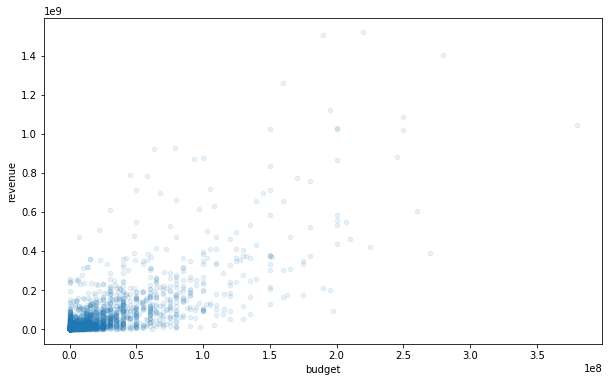

In [20]:
strat_train.plot(kind='scatter',x='budget',y='revenue',alpha=.1,figsize=(10,6));

A lot of the points are scattered towards the low end in terms of budget and revenue. There's a few movies that had really high budgets, but didn't end up generating too much revenue.

## Preprocess data

Using pipelines and custom transformers.

In [21]:
## training data
movies = strat_train.drop('revenue',axis=1)
## testing data
movies_revenue = strat_train['revenue'].copy()

It looks like we're missing a lot of information in `belongs_to_collection` and `homepage`, I'll have to explore those two variables individually and decide whether or not to keep them.

In [22]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)

belongs_to_collection    0.807917
homepage                 0.682083
tagline                  0.199167
Keywords                 0.095000
production_companies     0.053750
production_countries     0.019167
spoken_languages         0.007500
crew                     0.004167
cast                     0.003750
overview                 0.003333
genres                   0.001667
runtime                  0.000833
poster_path              0.000417
release_date             0.000000
original_title           0.000000
original_language        0.000000
imdb_id                  0.000000
status                   0.000000
budget                   0.000000
title                    0.000000
id                       0.000000
dtype: float64

### Numeric pipeline

There are two independent numeric variables, `budget` and `runtime`. In the trianing set, `runtime` is the only field missing runtime information. I'm going to impute both of these in a pipeline in case there are missing observations in the test dataset.

In [23]:
import numpy as np

## can use this to find all numeric features
movies_num = movies.drop('id',axis=1).select_dtypes(include='number')
movies_num.head()

,budget,runtime
2545,45000000,133.0
2415,0,98.0
1919,0,96.0
1462,8000000,101.0
220,12000000,132.0


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer


num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson',standardize=False),
    StandardScaler()
)

Because I'm planning on running a linear regression, I need to make sure that my features are on the same scale so that a) gradient descent converges quickly and b) I get better interpretability of my regression coefficients. This logic doesn't apply with random forests though, since they're based on decision thresholds.

In [25]:
pd.DataFrame(num_pipeline.fit_transform(movies_num),columns=movies_num.columns).head()

,budget,runtime
0,0.920848,1.128977
1,-1.501316,-0.431555
2,-1.501316,-0.522331
3,0.383308,-0.295753
4,0.499011,1.085046


### Categorical pipeline

In [26]:
movies.select_dtypes(include='object').head()

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
2545,NaN,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.patriotsdayfilm.com/,tt4572514,en,Patriots Day,An account of Boston Police Commissioner Ed Da...,/mIDxsJTrOC7NhgOo3GziiHyKfsQ.jpg,"[{'name': 'CBS Films', 'id': 5490}, {'name': '...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}, {'...",12/12/16,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,The inside story of the world's greatest manhunt.,Patriots Day,"[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...","[{'cast_id': 4, 'character': 'Sgt. Tommy Saund...","[{'credit_id': '587cad3bc3a3684a9e01776f', 'de..."
2415,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0106387,en,Benny & Joon,A mentally ill young woman finds her love in a...,/2a7amuuML6xvBn6XWV1sPG1Cmd5.jpg,"[{'name': 'Roth-Arnold Productions', 'id': 156...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/16/93,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A romance on the brink of reality.,Benny & Joon,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 2, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe43adc3a36847f8066f63', 'de..."
1919,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0458367,en,Right at Your Door,"A dirty bomb goes off in Los Angeles, jamming ...",/6h24yrqU5TfAMI6dZBdiDUU3M0p.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",1/23/06,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Right at Your Door,"[{'id': 4458, 'name': 'post-apocalyptic'}]","[{'cast_id': 3, 'character': 'Lexi', 'credit_i...","[{'credit_id': '52fe46709251416c75078597', 'de..."
1462,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://focusfeatures.com/its_kind_of_a_funny_s...,tt0804497,en,It's Kind of a Funny Story,A clinically depressed teenager gets a new sta...,/wADblWdHMk2SIaZRBazTGOTBf4w.jpg,"[{'name': 'Focus Features', 'id': 10146}]","[{'iso_3166_1': 'US', 'name': 'United States o...",7/6/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes what's in your head isn't as crazy a...,It's Kind of a Funny Story,"[{'id': 236, 'name': 'suicide'}, {'id': 894, '...","[{'cast_id': 11, 'character': 'Craig Gilner', ...","[{'credit_id': '567f355792514132db008f84', 'de..."
220,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.cityoflifeanddeath.co.uk/,tt1124052,zh,南京!南京!,"City of Life and Death takes place in 1937, du...",/zCzNvesRkmkmlK0g2Abp4y4zhb0.jpg,"[{'name': 'Media Asia Films', 'id': 5552}, {'n...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",4/22/09,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,City of Life and Death,"[{'id': 1327, 'name': 'war crimes'}, {'id': 15...","[{'cast_id': 1, 'character': 'Lu Jianxiong', '...","[{'credit_id': '53afe79a0e0a265975005fda', 'de..."


Check missing values: these are all the values that I need to fill as unknown. 

In [27]:
movies.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

belongs_to_collection    1939
homepage                 1637
tagline                   478
Keywords                  228
production_companies      129
production_countries       46
spoken_languages           18
crew                       10
cast                        9
overview                    8
genres                      4
poster_path                 1
status                      0
release_date                0
original_title              0
original_language           0
imdb_id                     0
title                       0
dtype: int64

The ones wrapped in dictionaries are `belongs_to_collection`, `genres`, `production_companies`, `production_countries`, `spoken_languages`, `Keywords`, `cast`, and `crew`.

#### Extract dates

* http://strftime.org/
* https://kite.com/python/docs/pandas.core.indexes.accessors.DatetimeProperties

In [28]:
dates = movies['release_date']
dates.isnull().sum()

0

In [29]:
dates[0]

'2/20/15'

In [30]:
dates = pd.to_datetime(dates,format="%m/%d/%y")
dates[0]

Timestamp('2015-02-20 00:00:00')

In [31]:
print("Month:", dates.dt.month[0]) ## 1 - 12
print("Day:", dates.dt.day[0])
print("Year:", dates.dt.year[0])
print("DOW:", dates.dt.weekday[0]) ## 0 - 6, 0 is Monday

Month: 2
Day: 20
Year: 2015
DOW: 4


Will also want to include season. How to interpret season?

In [ ]:
months = dates.dt.month
season = [1,1,2,2,2,3,3,3,4,4,4,1]

seasons = months.apply(lambda x: season[x-1])
seasons.head()

#### Extract genres

The `genres` field consists of a list of dictionaries, where each dictionary represents a single genre. This list is represented as a string. In order to extract the appropriate information, I'll have to convert the string to a list, then extract the genre from each element. I'll define a helper function, `get_vals()` to extract the genre from each dictionary.

In [97]:
type('st') is str

True

In [98]:
from collections import Counter, OrderedDict
from ast import literal_eval
from itertools import chain

## takes a list of dictionaries and extracts names using the 'name' key
def get_vals(dict_list,key):
        vals = []

        for d in dict_list:
            val = d[key]
            
            if type(val) is str:
                vals.append(val.lower())
            else:
                vals.append(val)

        return vals 

genres = movies['genres']
genres = genres.fillna("[{'name':'Unknown'}]")

## extract genre names 
genres_all = genres.apply(literal_eval).apply(lambda x: get_vals(x,'name'))
genres_flat = list(chain(*genres_all))

## check how much of each value
genres_count = Counter(genres_flat)
sorted(genres_count.items(),key=lambda item:(-item[1]))

[('drama', 1212),
 ('comedy', 824),
 ('thriller', 631),
 ('action', 584),
 ('romance', 473),
 ('crime', 388),
 ('adventure', 352),
 ('horror', 239),
 ('science fiction', 230),
 ('family', 217),
 ('fantasy', 178),
 ('mystery', 173),
 ('animation', 120),
 ('history', 109),
 ('war', 88),
 ('music', 76),
 ('documentary', 72),
 ('western', 28),
 ('foreign', 27),
 ('unknown', 4),
 ('tv movie', 1)]

About half of the 2400 movies in the training set are drama. The 12th biggest genre, mystery, encompasses only about 7.2% of movies. I want to be careful not to generalize to other movies without sufficient data, so mystery is the smallest genre that I'll be including in my model.

#### Extract production companies

In [34]:
studios = movies['production_companies']
studios[0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

The structure of `production_companies` is very similar to `genres`. I just need to extract the name, as before. I'll follow the same structure.

In [35]:
## 129 missing values
studios.isnull().sum()

129

In [36]:
studios = studios.fillna("[{'name':'Unknown'}]")
studios.head()

2545    [{'name': 'CBS Films', 'id': 5490}, {'name': '...
2415    [{'name': 'Roth-Arnold Productions', 'id': 156...
1919                                 [{'name':'Unknown'}]
1462            [{'name': 'Focus Features', 'id': 10146}]
220     [{'name': 'Media Asia Films', 'id': 5552}, {'n...
Name: production_companies, dtype: object

In [38]:
studios_all = studios.apply(literal_eval).apply(lambda x: get_vals(x,'name'))
studios_flat = list(chain(*studios_all))
studios_count = Counter(studios_flat)
sorted(studios_count.items(), key = lambda item: -item[1])

[('warner bros.', 160),
 ('universal pictures', 153),
 ('unknown', 129),
 ('paramount pictures', 123),
 ('twentieth century fox film corporation', 116),
 ('columbia pictures', 74),
 ('metro-goldwyn-mayer (mgm)', 66),
 ('new line cinema', 66),
 ('columbia pictures corporation', 53),
 ('walt disney pictures', 51),
 ('touchstone pictures', 51),
 ('tristar pictures', 46),
 ('relativity media', 42),
 ('canal+', 38),
 ('miramax films', 36),
 ('united artists', 32),
 ('village roadshow pictures', 28),
 ('regency enterprises', 28),
 ('lionsgate', 27),
 ('working title films', 26),
 ('dune entertainment', 24),
 ('fox searchlight pictures', 22),
 ('bbc films', 21),
 ('orion pictures', 20),
 ('studiocanal', 20),
 ('dimension films', 19),
 ('epsilon motion pictures', 19),
 ('morgan creek productions', 19),
 ('fox 2000 pictures', 18),
 ('dreamworks skg', 18),
 ('summit entertainment', 18),
 ('castle rock entertainment', 18),
 ('original film', 18),
 ('hollywood pictures', 17),
 ('film4', 17),
 ('am

I'll keep the top 20 studios.

#### Extract production companies

In [99]:
countries = movies['production_countries']
countries[0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [100]:
countries = countries.fillna("[{'name':'Unknown'}]")
countries_all = countries.apply(literal_eval).apply(lambda x: get_vals(x,'name'))
countries_flat = list(chain(*countries_all))
countries_count = Counter(countries_flat)
sorted(countries_count.items(), key = lambda item: -item[1])

[('united states of america', 1833),
 ('united kingdom', 301),
 ('france', 178),
 ('germany', 129),
 ('canada', 98),
 ('india', 68),
 ('italy', 53),
 ('japan', 51),
 ('australia', 47),
 ('unknown', 46),
 ('spain', 45),
 ('russia', 43),
 ('hong kong', 32),
 ('china', 28),
 ('ireland', 20),
 ('belgium', 19),
 ('south korea', 16),
 ('mexico', 16),
 ('sweden', 16),
 ('new zealand', 13),
 ('netherlands', 13),
 ('czech republic', 10),
 ('denmark', 10),
 ('luxembourg', 9),
 ('brazil', 8),
 ('hungary', 8),
 ('south africa', 7),
 ('united arab emirates', 7),
 ('romania', 6),
 ('switzerland', 6),
 ('austria', 6),
 ('israel', 5),
 ('poland', 5),
 ('finland', 5),
 ('greece', 5),
 ('chile', 5),
 ('iran', 5),
 ('norway', 4),
 ('argentina', 4),
 ('bulgaria', 3),
 ('turkey', 3),
 ('bahamas', 3),
 ('morocco', 3),
 ('pakistan', 2),
 ('ukraine', 2),
 ('singapore', 2),
 ('indonesia', 2),
 ('philippines', 2),
 ('taiwan', 2),
 ('malta', 2),
 ('qatar', 2),
 ('tunisia', 2),
 ('cambodia', 1),
 ('ethiopia', 1),

#### Extract original language

In [101]:
pd.get_dummies(movies['original_language']).head()

,ar,cn,cs,da,de,en,es,fa,fi,fr,...,pt,ro,ru,sv,ta,te,tr,ur,vi,zh
2545,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2415,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1462,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Extract keyword info

In [110]:
keywords = movies['Keywords']
keywords = keywords.fillna("[{'name':'Unknown'}]")
keywords_all = keywords.apply(literal_eval).apply(lambda x: get_vals(x,'name'))

Get number of keywords in total.

In [111]:
keywords_all.apply(len).head()

2545    6
2415    3
1919    1
1462    9
220     8
Name: Keywords, dtype: int64

Also, extract top keywords. 

In [263]:
keywords_count = Counter(list(chain(*keywords_all)))
sorted(keywords_count.items(), key = lambda item: -item[1])

[('unknown', 228),
 ('woman director', 143),
 ('independent film', 128),
 ('duringcreditsstinger', 102),
 ('murder', 96),
 ('based on novel', 89),
 ('violence', 72),
 ('sport', 66),
 ('aftercreditsstinger', 61),
 ('sex', 60),
 ('biography', 60),
 ('revenge', 59),
 ('dystopia', 58),
 ('love', 56),
 ('police', 56),
 ('sequel', 55),
 ('suspense', 54),
 ('friendship', 53),
 ('teenager', 48),
 ('nudity', 48),
 ('drug', 45),
 ('female nudity', 42),
 ('prison', 40),
 ('los angeles', 39),
 ('high school', 38),
 ('musical', 38),
 ('father son relationship', 37),
 ('new york', 37),
 ('london england', 33),
 ('kidnapping', 31),
 ('detective', 31),
 ('investigation', 31),
 ('escape', 30),
 ('brother brother relationship', 30),
 ('wedding', 30),
 ('based on true story', 30),
 ('3d', 29),
 ('rape', 29),
 ('corruption', 29),
 ('paris', 29),
 ('alien', 29),
 ('family', 28),
 ('based on comic', 27),
 ('jealousy', 27),
 ('vampire', 27),
 ('soldier', 26),
 ('prostitute', 26),
 ('death', 26),
 ('robbery',

Keep 20 and skip `unknown`.

#### Extract cast info

* cast size
* key actors
* genders

In [118]:
cast = movies['cast']
literal_eval(cast[2545])

[{'cast_id': 4,
  'character': 'Sgt. Tommy Saunders',
  'credit_id': '56ec835dc3a368226e003b5c',
  'gender': 2,
  'id': 13240,
  'name': 'Mark Wahlberg',
  'order': 0,
  'profile_path': '/tdPF78kdzxPcCwxKjPykq6u3y5Z.jpg'},
 {'cast_id': 5,
  'character': 'Commisioner Ed Davis',
  'credit_id': '56ec8364c3a3682260003b35',
  'gender': 2,
  'id': 1230,
  'name': 'John Goodman',
  'order': 1,
  'profile_path': '/eOIx8zj1vYIRhVY2bK5cjIQfua0.jpg'},
 {'cast_id': 6,
  'character': 'Sgt. Jeffrey Pugliese',
  'credit_id': '56ec8377c3a3682260003b37',
  'gender': 2,
  'id': 18999,
  'name': 'J.K. Simmons',
  'order': 2,
  'profile_path': '/jPoNW5fugs5h8AbcE7H5OBm04Tm.jpg'},
 {'cast_id': 9,
  'character': 'Richard DesLauriers',
  'credit_id': '573952d592514160360004cd',
  'gender': 2,
  'id': 4724,
  'name': 'Kevin Bacon',
  'order': 3,
  'profile_path': '/bMVujB1SaHhXD5gQdO4Xf47WXD3.jpg'},
 {'cast_id': 10,
  'character': 'Carol Saunders',
  'credit_id': '573953039251412341001155',
  'gender': 1,
  '

In [129]:
cast = cast.fillna("[{'name':'Unknown','gender':0}]")
num_cast = cast.apply(literal_eval).apply(len)

In [260]:
cast_names = cast.apply(literal_eval).apply(lambda x: get_vals(x,'name'))
cast_names_all = list(chain(*cast_names))
cast_names_count = Counter(cast_all)
sorted(cast_names_count.items(), key = lambda item: -item[1])

[('j.k. simmons', 25),
 ('robert de niro', 23),
 ('susan sarandon', 22),
 ('morgan freeman', 21),
 ('john turturro', 21),
 ('forest whitaker', 20),
 ('jason statham', 20),
 ('bill murray', 20),
 ('liam neeson', 20),
 ('samuel l. jackson', 20),
 ('dennis quaid', 19),
 ('richard jenkins', 19),
 ('alec baldwin', 19),
 ('bruce willis', 19),
 ('john goodman', 18),
 ('willem dafoe', 18),
 ('nicolas cage', 18),
 ('gene hackman', 18),
 ('sigourney weaver', 18),
 ('william h. macy', 17),
 ('bruce mcgill', 17),
 ('keith david', 17),
 ('owen wilson', 17),
 ('george clooney', 17),
 ('brian cox', 16),
 ('sylvester stallone', 16),
 ('cheech marin', 16),
 ('matt damon', 16),
 ('steve buscemi', 16),
 ('denzel washington', 16),
 ('jason bateman', 16),
 ('ethan hawke', 16),
 ('mark wahlberg', 15),
 ('kevin bacon', 15),
 ('jim broadbent', 15),
 ('john c. reilly', 15),
 ('michael shannon', 15),
 ('julia roberts', 15),
 ('mel gibson', 15),
 ('john cusack', 15),
 ('michael caine', 15),
 ('robert downey jr.'

Get gender as well.

In [222]:
cast_genders = cast.apply(literal_eval).apply(lambda x: get_vals(x,'gender'))
cast_genders_all = list(chain(*cast_genders))
Counter(cast_genders_all)

Counter({2: 22292, 1: 10844, 0: 16414})

In [223]:
literal_eval(cast[2545])

[{'cast_id': 4,
  'character': 'Sgt. Tommy Saunders',
  'credit_id': '56ec835dc3a368226e003b5c',
  'gender': 2,
  'id': 13240,
  'name': 'Mark Wahlberg',
  'order': 0,
  'profile_path': '/tdPF78kdzxPcCwxKjPykq6u3y5Z.jpg'},
 {'cast_id': 5,
  'character': 'Commisioner Ed Davis',
  'credit_id': '56ec8364c3a3682260003b35',
  'gender': 2,
  'id': 1230,
  'name': 'John Goodman',
  'order': 1,
  'profile_path': '/eOIx8zj1vYIRhVY2bK5cjIQfua0.jpg'},
 {'cast_id': 6,
  'character': 'Sgt. Jeffrey Pugliese',
  'credit_id': '56ec8377c3a3682260003b37',
  'gender': 2,
  'id': 18999,
  'name': 'J.K. Simmons',
  'order': 2,
  'profile_path': '/jPoNW5fugs5h8AbcE7H5OBm04Tm.jpg'},
 {'cast_id': 9,
  'character': 'Richard DesLauriers',
  'credit_id': '573952d592514160360004cd',
  'gender': 2,
  'id': 4724,
  'name': 'Kevin Bacon',
  'order': 3,
  'profile_path': '/bMVujB1SaHhXD5gQdO4Xf47WXD3.jpg'},
 {'cast_id': 10,
  'character': 'Carol Saunders',
  'credit_id': '573953039251412341001155',
  'gender': 1,
  '

0 is unknown, 1 is women, 2 is men.

In [224]:
## women
print(cast_genders.apply(lambda x: x.count(1)).head())

## men
print(cast_genders.apply(lambda x: x.count(2)).head())

2545    5
2415    7
1919    2
1462    7
220     1
Name: cast, dtype: int64
2545     5
2415     9
1919     6
1462    10
220      2
Name: cast, dtype: int64


#### Extract crew

* Departments
* Jobs
* Top names

In [250]:
crew = movies['crew']
crew.isnull().sum()

10

In [251]:
literal_eval(crew[2545])

[{'credit_id': '587cad3bc3a3684a9e01776f',
  'department': 'Lighting',
  'gender': 0,
  'id': 1739785,
  'job': 'Rigging Grip',
  'name': 'Shawn S. Ryder',
  'profile_path': None},
 {'credit_id': '587cad4b9251413e9201876d',
  'department': 'Lighting',
  'gender': 0,
  'id': 1739786,
  'job': 'Rigging Grip',
  'name': 'Chris Ryerson',
  'profile_path': None},
 {'credit_id': '56ec832092514143fc0037bc',
  'department': 'Directing',
  'gender': 2,
  'id': 36602,
  'job': 'Director',
  'name': 'Peter Berg',
  'profile_path': '/1pR16H0zqRG49ns8cYykYpodgGF.jpg'},
 {'credit_id': '57f383b09251410c28009254',
  'department': 'Production',
  'gender': 1,
  'id': 67682,
  'job': 'Producer',
  'name': 'Dorothy Aufiero',
  'profile_path': None},
 {'credit_id': '57f383c19251410c2a0090ab',
  'department': 'Production',
  'gender': 0,
  'id': 935717,
  'job': 'Producer',
  'name': 'Dylan Clark',
  'profile_path': None},
 {'credit_id': '582a1f569251417b2303a7b2',
  'department': 'Production',
  'gender':

In [252]:
crew = crew.fillna("[{'department':'unknown','name':'unknown','job':'unknown'}]")

In [253]:
crew.isnull().sum()

0

In [254]:
crew_departments = crew.apply(literal_eval).apply(lambda x: get_vals(x,'department'))
crew_departments_all = list(chain(*crew_departments))
crew_departments_count = Counter(crew_departments_all)

In [261]:
sorted(crew_departments_count.items(), key = lambda item: -item[1])

[('production', 12608),
 ('sound', 7539),
 ('art', 6480),
 ('crew', 5921),
 ('writing', 5310),
 ('costume & make-up', 4911),
 ('camera', 4366),
 ('directing', 4033),
 ('editing', 3603),
 ('visual effects', 2795),
 ('lighting', 1054),
 ('unknown', 10),
 ('actors', 2)]

Crew jobs.

In [256]:
crew_jobs = crew.apply(literal_eval).apply(lambda x: get_vals(x,'job'))
crew_jobs_all = list(chain(*crew_jobs))
crew_jobs_count = Counter(crew_jobs_all)

In [262]:
sorted(crew_jobs_count.items(), key = lambda item: -item[1])

[('producer', 4794),
 ('executive producer', 2695),
 ('director', 2604),
 ('screenplay', 2409),
 ('editor', 2277),
 ('casting', 1971),
 ('director of photography', 1818),
 ('original music composer', 1571),
 ('art direction', 1472),
 ('production design', 1325),
 ('costume design', 1264),
 ('writer', 1244),
 ('set decoration', 1083),
 ('makeup artist', 873),
 ('sound re-recording mixer', 789),
 ('camera operator', 756),
 ('script supervisor', 746),
 ('hairstylist', 628),
 ('sound effects editor', 614),
 ('visual effects supervisor', 588),
 ('still photographer', 580),
 ('music editor', 573),
 ('stunts', 558),
 ('animation', 545),
 ('dialogue editor', 529),
 ('visual effects producer', 520),
 ('music', 514),
 ('stunt coordinator', 509),
 ('supervising sound editor', 490),
 ('co-producer', 481),
 ('associate producer', 478),
 ('foley', 452),
 ('costume supervisor', 449),
 ('story', 423),
 ('set costumer', 415),
 ('sound designer', 415),
 ('gaffer', 379),
 ('novel', 374),
 ('set designer'

# PICK UP HERE ------

In [324]:
dir = 'director'

In [325]:
crew_jobs.apply(lambda x: x.count(dir))

2545    1
2415    1
1919    1
1462    2
220     1
378     1
750     2
2956    1
663     1
2884    1
497     1
1298    1
911     1
2823    1
613     1
2432    1
1463    1
300     1
756     1
1132    1
2963    1
25      1
1975    1
2101    1
2329    1
166     1
736     2
73      2
921     1
759     1
       ..
260     1
1272    1
269     1
2007    1
2641    1
2259    1
1080    1
1148    1
1346    1
1372    1
1805    1
1897    1
820     1
656     1
1276    1
965     1
1636    1
2128    1
2327    1
1446    1
907     1
125     1
391     1
1873    1
2756    1
361     1
1837    1
2942    1
2896    1
1142    1
Name: crew, Length: 2400, dtype: int64

In [237]:
crew_names = crew.apply(literal_eval).apply(lambda x: get_vals(x,'name'))
crew_names_all = list(chain(*crew_names))
crew_names_count = Counter(crew_names_all)

sorted(crew_names_count.items(), key = lambda items: -items[1])

[('avy kaufman', 41),
 ('robert rodriguez', 35),
 ('deborah aquila', 33),
 ('jerry goldsmith', 30),
 ('luc besson', 30),
 ('james newton howard', 29),
 ('tricia wood', 29),
 ('francine maisler', 29),
 ('steven spielberg', 28),
 ('janet hirshenson', 26),
 ('kerry barden', 26),
 ('james horner', 26),
 ('mary vernieu', 26),
 ('bob weinstein', 25),
 ('jane jenkins', 25),
 ('john debney', 25),
 ('harvey weinstein', 24),
 ('clint eastwood', 24),
 ('sarah finn', 24),
 ('billy hopkins', 24),
 ('hans bjerno', 23),
 ('mark isham', 23),
 ('scott rudin', 23),
 ('alan silvestri', 22),
 ('tim bevan', 22),
 ('eric fellner', 22),
 ('arnon milchan', 22),
 ('danny elfman', 22),
 ('francis ford coppola', 21),
 ('randi hiller', 21),
 ('john papsidera', 21),
 ('bruce berman', 21),
 ('neal h. moritz', 21),
 ('thomas newman', 20),
 ('suzanne smith', 20),
 ('graeme revell', 20),
 ('mindy marin', 20),
 ('michael mann', 19),
 ('frank marshall', 19),
 ('robert zemeckis', 18),
 ('randall poster', 18),
 ('marco be

#### Build the categorical transformer

In [294]:
## TransformerMixin gives fit_transform()
## BaseEstimator gives get_params() and set_params(), useful for hyperparameter tuning
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X,y=None):
        return X.loc[:,self.key]

class CatTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.genres = []
        self.top_genres = []
        
        self.studios = []
        self.top_studios = []
        
        self.countries = []
        self.top_countries = []
        
        self.keywords = []
        self.top_keywords = []
        
        self.cast_members = []
        self.top_cast_members = []
        
        self.cast_genders = []
        
        self.crew_departments = []
        self.top_crew_departments = []
        
        self.crew_jobs = []
        self.top_crew_jobs = []
        
        self.crew_names = []
        self.top_crew_names = []
        
    ## extracts names from a list of dictionary objects
    def _get_names(self,column):
        column = column.fillna("[{'name':'unknown'}]")    ## fill missing values 
        column = column.apply(literal_eval).apply(lambda x: get_vals(x,'name')) ## extract genre names 
        return column
    
    def _get_genders(self,column):
        column = column.fillna("[{'gender':0}]")
        column = column.apply(literal_eval).apply(lambda x: get_vals(x,'gender'))
        return column
    
    def _get_departments(self,column):
        column = column.fillna("[{'department':'unknown'}]")
        column = column.apply(literal_eval).apply(lambda x: get_vals(x,'department'))
        return column
    
    def _get_jobs(self,column):
        column = column.fillna("[{'job':'unknown'}]")
        column = column.apply(literal_eval).apply(lambda x: get_vals(x,'job'))
        return column

    ## extract top names from a column of name lists 
    def _get_top_names(self,column,top_n=10):
        elements = list(chain(*column))                                     ## unpack a list of lists
        top_elements = [t[0] for t in Counter(elements).most_common(top_n)] ## extract top names from Collections obj      
        return top_elements        
    
    def fit(self,X,y=None):
        ## genres
        self.genres = self._get_names(X['genres'])
        self.top_genres = self._get_top_names(self.genres,12)   
        if 'unknown' in self.top_genres:
            self.top_genres.remove('unknown')
        
        ## studios
        self.studios = self._get_names(X['production_companies'])
        self.top_studios = self._get_top_names(self.studios,20)
        if 'unknown' in self.top_studios:
            self.top_studios.remove('unknown')
        
        ## countries
        self.countries = self._get_names(X['production_countries'])
        self.top_countries = self._get_top_names(self.countries,15)
        if 'unknown' in self.top_countries:
            self.top_countries.remove('unknown')
        
        ## keywords
        self.keywords = self._get_names(X['Keywords'])
        self.top_keywords = self._get_top_names(self.keywords,20)
        if 'unknown ' in self.top_keywords:
            self.top_keywords.remove('unknown')
            
        ## cast
        self.cast_members = self._get_names(X['cast'])
        self.top_cast_members = self._get_top_names(self.cast_members,50)
        if 'unknown' in self.top_cast_members:
            self.top_cast_members.remove('unknown')
        
        self.cast_genders = self._get_genders(X['cast'])
        
        ## crew
        self.crew_departments = self._get_departments(X['crew'])
        self.top_crew_departments = self._get_top_names(self.crew_departments,11)
        if 'unknown' in self.top_crew_departments:
            self.top_crew_departments.remove('unknown')
        
        self.crew_jobs = self._get_jobs(X['crew'])
        self.top_crew_jobs = self._get_top_names(self.crew_departments,100)
        if 'unknown' in self.top_crew_jobs:
            self.top_crew_jobs.remove('unknown')

        self.crew_names = self._get_names(X['crew'])
        self.top_crew_names = self._get_top_names(self.crew_names,50)
        if 'unknown' in self.top_crew_names:
            self.top_crew_names.remove('unknown')
        
        return self
    
    def transform(self,X,y=None):    
        ## engineer features from date
        dates = pd.to_datetime(X['release_date'],format="%m/%d/%y")
        X['release_month'] = dates.dt.month
        X['release_day'] = dates.dt.day
        X['release_year'] = dates.dt.year
        X['release_dow'] = dates.dt.weekday
        
        months = dates.dt.month
        ## 1 = winter; 2 = spring; 3 = summer; 4 = fall
        season_map = [1,1,2,2,2,3,3,3,4,4,4,1]
        season = months.apply(lambda x: season_map[x-1])
        X['is_summer'] = season.apply(lambda x: 1 if x == 3 else 0) 
        X['is_winter'] = season.apply(lambda x: 1 if x == 1 else 0) 

        X = X.drop(['release_date'],axis=1)
        
        ## top genre columns
        for top_genre in self.top_genres:
            X['genre_'+top_genre] = self.genres.apply(lambda movie_genres: 1 if top_genre in movie_genres else 0)
        X = X.drop('genres', axis=1) ## get rid of column so that the model can process 
        
        ## production studio columns
        for top_studio in self.top_studios:
            X['studio_'+top_studio] = self.studios.apply(lambda movie_studios: 1 if top_studio in movie_studios else 0)
        X = X.drop('production_companies',axis=1)
        
        ## production country columns
        for top_country in self.top_countries:
            X['country_'+top_country] = self.countries.apply(lambda movie_countries: 1 if top_country in movie_countries else 0)
        X = X.drop('production_countries',axis=1)
        
        ## get languages
        languages_dummy = pd.get_dummies(movies['original_language'],prefix='lang')
        X = pd.concat([X, languages_dummy], axis=1, join='outer')
        X = X.drop('original_language',axis=1)
        
        ## extract keyword info: number of keywords, top keywords
        X['num_keywords'] = self.keywords.apply(len)
        
        for top_keyword in self.top_keywords:
            X['keyword_'+top_keyword] = self.keywords.apply(lambda movie_keywords: 1 if top_keyword in movie_keywords else 0)
        X = X.drop('Keywords',axis=1) 
        
        ## extract cast info: number of cast, number of each gender, top keywords
        X['num_cast'] = self.cast_members.apply(len)
        
        for top_cast_member in self.top_cast_members:
            X['actor_'+top_cast_member] = self.cast_members.apply(lambda movie_cast_members: \
                                                                  1 if top_cast_member in movie_cast_members else 0)
        X['num_actresses'] = self.cast_genders.apply(lambda x: x.count(1))
        X['num_actors'] = self.cast_genders.apply(lambda x: x.count(2))
        
        X = X.drop('cast',axis=1)
        
        ## extract crew info: number of departments, number of jobs, and top names
        for top_department in self.top_crew_departments:
            X['department_'+top_department] = self.crew_departments.apply(lambda x: x.count(top_department))
            
        for top_job in self.top_crew_jobs:
            X['job_'+top_job] = self.crew_jobs.apply(lambda x: x.count(top_job))

        for top_name in self.top_crew_names:
            X['crew_name_'+top_name] = self.crew_names.apply(lambda x: x.count(top_name))
            
        X = X.drop('crew',axis=1)
        
        return X
    

#### Build the categorical pipeline

In [295]:
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ('cat_selector',FeatureSelector(['release_date',
                                     'genres',
                                     'production_companies',
                                     'production_countries',
                                     'original_language',
                                     'Keywords',
                                     'cast',
                                     'crew'
                                    ])),
    ('cat_transformer',CatTransformer())
])

#### Test pipeline

In [296]:
cat_pipeline.fit_transform(movies);

### Put the pipelines together 

In [297]:
from sklearn.pipeline import FeatureUnion

## these give you the columns you want
num_cols = list(movies.drop('id',axis=1).select_dtypes(include='number').columns)
cat_cols = list(movies.select_dtypes('object').columns)

In [298]:
num_pipeline = make_pipeline(
    FeatureSelector(num_cols),
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson',standardize=False),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    FeatureSelector(['release_date',
                     'genres',
                     'production_companies',
                     'production_countries',
                     'original_language',
                     'Keywords',
                     'cast',
                     'crew'
                    ]), ## use cat_cols in the future
    CatTransformer()
)

full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

Transform the data

In [299]:
num_features = num_cols.copy()
cat_features = list(cat_pipeline.fit_transform(movies).columns)

## these are all the column names
attributes = num_features + cat_features 

movies_prepared = full_pipeline.fit_transform(movies)

In [300]:
## Total number of features
len(num_features) + len(cat_features)

233

In [301]:
movies_prepared.shape

(2400, 233)

## Another round of exploration

Now that the data has been processed, this is another opportunity to visualize data.

In [308]:
type(movies_prepared)

numpy.ndarray

In [310]:
movies_prepared = pd.DataFrame(movies_prepared,columns=attributes)

In [315]:
## that ain't right
movies_prepared['job_production'].value_counts()

0.0    2400
Name: job_production, dtype: int64

In [329]:
movies_prepared['job_camera'].value_counts()

0.0    2400
Name: job_camera, dtype: int64

In [328]:
list(movies_prepared.columns)

['budget',
 'runtime',
 'release_month',
 'release_day',
 'release_year',
 'release_dow',
 'is_summer',
 'is_winter',
 'genre_drama',
 'genre_comedy',
 'genre_thriller',
 'genre_action',
 'genre_romance',
 'genre_crime',
 'genre_adventure',
 'genre_horror',
 'genre_science fiction',
 'genre_family',
 'genre_fantasy',
 'genre_mystery',
 'studio_warner bros.',
 'studio_universal pictures',
 'studio_paramount pictures',
 'studio_twentieth century fox film corporation',
 'studio_columbia pictures',
 'studio_metro-goldwyn-mayer (mgm)',
 'studio_new line cinema',
 'studio_columbia pictures corporation',
 'studio_walt disney pictures',
 'studio_touchstone pictures',
 'studio_tristar pictures',
 'studio_relativity media',
 'studio_canal+',
 'studio_miramax films',
 'studio_united artists',
 'studio_village roadshow pictures',
 'studio_regency enterprises',
 'studio_lionsgate',
 'studio_working title films',
 'country_united states of america',
 'country_united kingdom',
 'country_france',
 'co

## Linear regression

In [302]:
from sklearn.linear_model import LinearRegression

## fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(movies_prepared, movies_revenue)

from sklearn.metrics import mean_squared_error

## make predictions and evalute
movies_predictions = lin_reg.predict(movies_prepared)
lin_mse = mean_squared_error(movies_revenue,movies_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

92109815.56115274

In [303]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Test this out on sample predictions.

As expected, the predictions weren't that close. Still, we can look at the regression coefficients below just for fun. 


In [304]:
sorted(list(zip(lin_reg.coef_, attributes)),reverse=True)

[(3042948813189888.0, 'job_production'),
 (2419699529254656.0, 'job_directing'),
 (1614482166956032.0, 'job_writing'),
 (726072843945728.0, 'job_actors'),
 (541987321854848.0, 'job_editing'),
 (443725568559104.0, 'job_costume & make-up'),
 (225406986.58409292, 'crew_name_christopher boyes'),
 (128825837.49215196, 'studio_walt disney pictures'),
 (115210575.90395138, 'crew_name_howard shore'),
 (102585708.1363263, 'crew_name_michael bay'),
 (88024598.3145058, 'crew_name_sarah finn'),
 (86639806.89704552, 'crew_name_neal h. moritz'),
 (86129589.84056859, 'crew_name_janet hirshenson'),
 (82356607.73871404, 'crew_name_steven spielberg'),
 (81104254.8730013, 'crew_name_harvey weinstein'),
 (79461061.98090784, 'crew_name_bruce berman'),
 (76421770.92958857, 'crew_name_james newton howard'),
 (75425880.69956884, 'actor_samuel l. jackson'),
 (70091423.07252355, 'country_japan'),
 (67899078.93036313, 'crew_name_thomas newman'),
 (64969048.1958046, 'keyword_sequel'),
 (59192646.53738749, 'actor_

It looks like adventure flicks generally do well in the box office. 

### Cross-validate

In [305]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:", scores.std())
    
lin_scores = cross_val_score(lin_reg,movies_prepared,movies_revenue,scoring="neg_mean_squared_error",cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.03326898e+16 9.26723195e+17 9.40456234e+07 1.35573797e+17
 1.16499286e+17 1.38556838e+17 2.22020491e+17 2.11559553e+17
 1.04672944e+08 2.58135398e+17]
Mean: 2.019401248002681e+17
Standard deviation: 2.5747995392558518e+17


A variance of \\$11m, with \\$20m in std error is not good. We can do better with random forest.

## Random forest

Run a grid search to find the best values for the model. 

In [313]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[200,300],
    'max_depth':[6,8,10,12,14],
    'max_features': [10,30,50,70]
}

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=10,
                          scoring="neg_mean_squared_error",verbose=1,n_jobs=4)
grid_search.fit(movies_prepared,movies_revenue)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  3.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [100, 300, 500], 'max_depth': [6, 8, 10, 12, 14], 'max_features': [10, 30, 50, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [316]:
grid_search.best_params_

{'max_depth': 14, 'max_features': 70, 'n_estimators': 100}

In [317]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=70, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [318]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

104474947.67884222 {'max_depth': 6, 'max_features': 10, 'n_estimators': 100}
104158072.8154607 {'max_depth': 6, 'max_features': 10, 'n_estimators': 300}
103817612.56179479 {'max_depth': 6, 'max_features': 10, 'n_estimators': 500}
92817119.36504166 {'max_depth': 6, 'max_features': 30, 'n_estimators': 100}
93035767.32058479 {'max_depth': 6, 'max_features': 30, 'n_estimators': 300}
92864773.56357726 {'max_depth': 6, 'max_features': 30, 'n_estimators': 500}
89072494.6263176 {'max_depth': 6, 'max_features': 50, 'n_estimators': 100}
88323764.35017605 {'max_depth': 6, 'max_features': 50, 'n_estimators': 300}
88369521.75954601 {'max_depth': 6, 'max_features': 50, 'n_estimators': 500}
87355257.13153856 {'max_depth': 6, 'max_features': 70, 'n_estimators': 100}
86501044.11004168 {'max_depth': 6, 'max_features': 70, 'n_estimators': 300}
86608455.9843213 {'max_depth': 6, 'max_features': 70, 'n_estimators': 500}
99720959.53962457 {'max_depth': 8, 'max_features': 10, 'n_estimators': 100}
99536244.917

In [319]:
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
feature_importances = best_rf.feature_importances_
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34752859397938773, 'budget'),
 (0.05723207699787267, 'department_visual effects'),
 (0.050380290290814075, 'num_actors'),
 (0.035960544390091165, 'num_cast'),
 (0.032913384568138505, 'crew_name_christopher boyes'),
 (0.032034054751931273, 'runtime'),
 (0.03156635374124097, 'num_actresses'),
 (0.027266908695650797, 'genre_adventure'),
 (0.021157108289539855, 'department_art'),
 (0.0202461085466992, 'department_costume & make-up'),
 (0.0191398052668781, 'release_year'),
 (0.018896969331120252, 'department_camera'),
 (0.017196643902483443, 'department_crew'),
 (0.016800607505269315, 'department_production'),
 (0.015659687261052456, 'num_keywords'),
 (0.013906131205426475, 'department_editing'),
 (0.01297381295578137, 'release_day'),
 (0.012828660207548685, 'release_month'),
 (0.01247336449123852, 'release_dow'),
 (0.011000520729203576, 'studio_walt disney pictures'),
 (0.010872681703011531, 'department_sound'),
 (0.009878994784264048, 'department_directing'),
 (0.009736002820106941, '

## Feature selection

## Evaluate on test data

In [ ]:
final_model =  grid_search.best_estimator_

In [ ]:
X_test = strat_test.drop("revenue",axis=1)
y_test = strat_test["revenue"]

X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
X_test_prepared.shape

In [ ]:
X_test_prepared

In [ ]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse